### Step 1: Import Libraries


In [1]:
# Importing core libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# For creating 3D plots
from mpl_toolkits.mplot3d import Axes3D

# Importing modules from scikit-learn for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### Step 2: Load and Explore dataset


In [2]:
# Load the dataset
df = pd.read_csv('../datasets/diabetes-disease.csv')

# Display the first few rows
print("Head of the dataset:")
print(df.head())

Head of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Display number of unique values for each column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values per column:
Pregnancies: 17 unique values
Glucose: 136 unique values
BloodPressure: 47 unique values
SkinThickness: 51 unique values
Insulin: 186 unique values
BMI: 248 unique values
DiabetesPedigreeFunction: 517 unique values
Age: 52 unique values
Outcome: 2 unique values


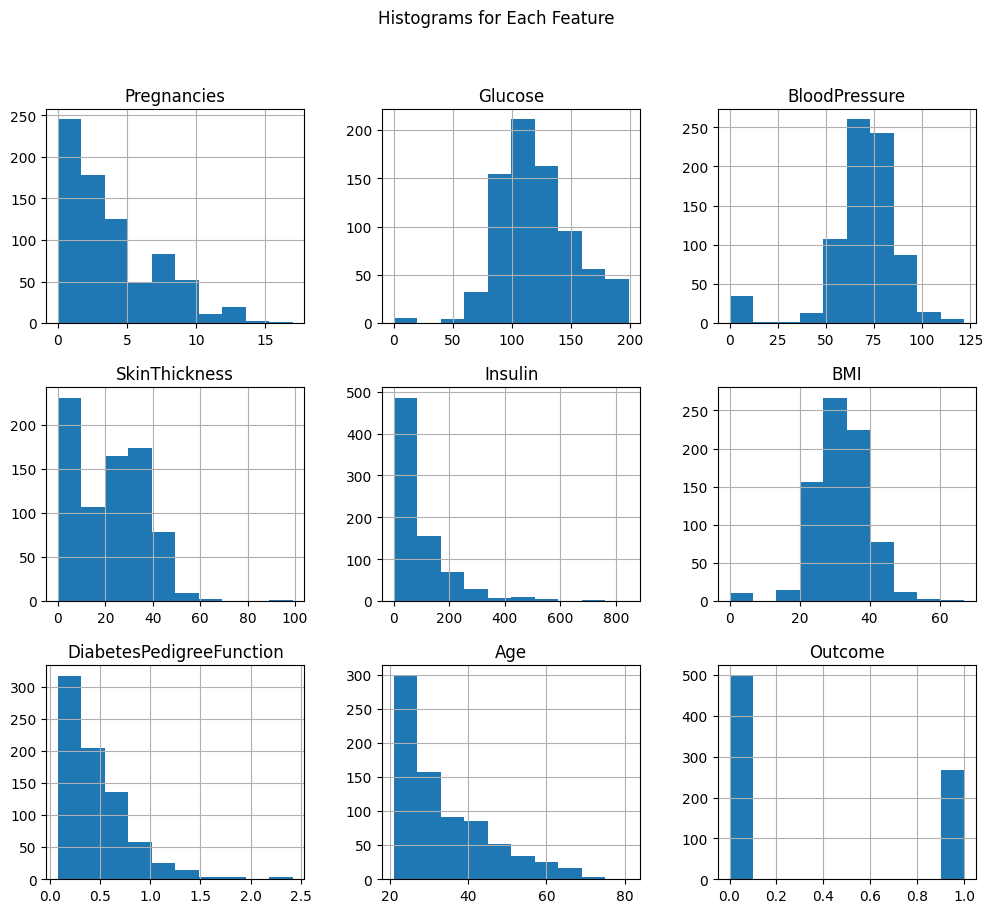

In [5]:
# Plot 1: Histograms for each numerical feature
df.hist(figsize=(12, 10))
plt.suptitle("Histograms for Each Feature")
plt.show()

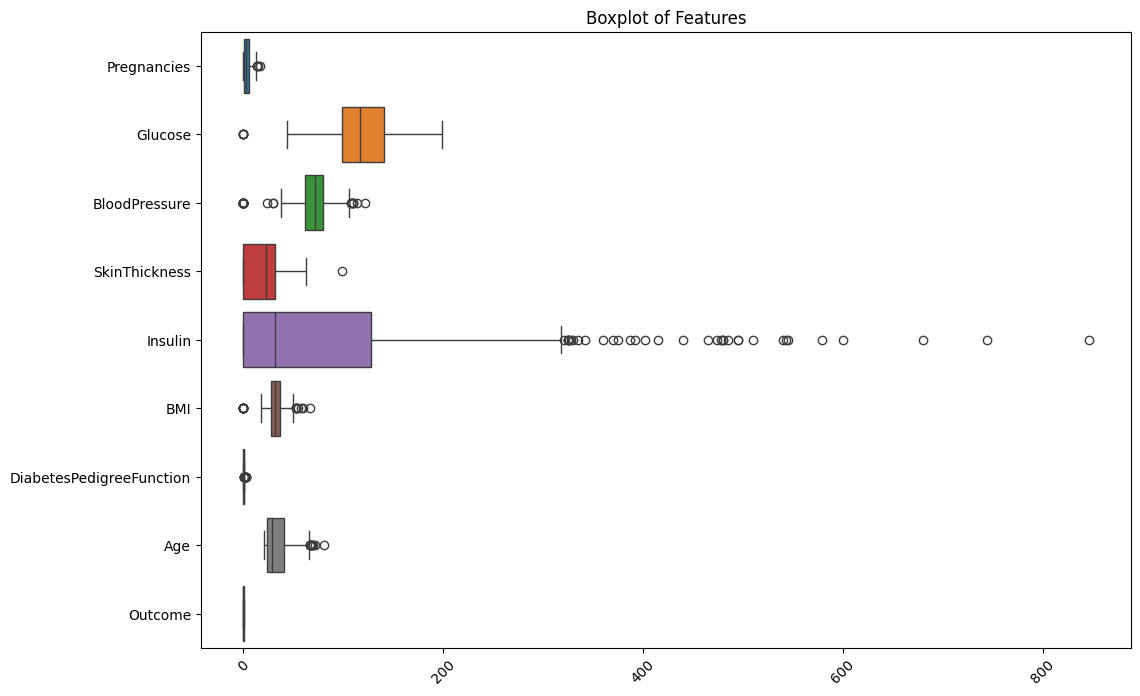

In [6]:
# Plot 2: Boxplots for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()


In [7]:
# # Plot 3: Pairplot to visualize pairwise relationships and distributions
# sns.pairplot(df, diag_kind="kde")
# plt.suptitle("Pairplot of the Dataset", y=1.02)
# plt.show()

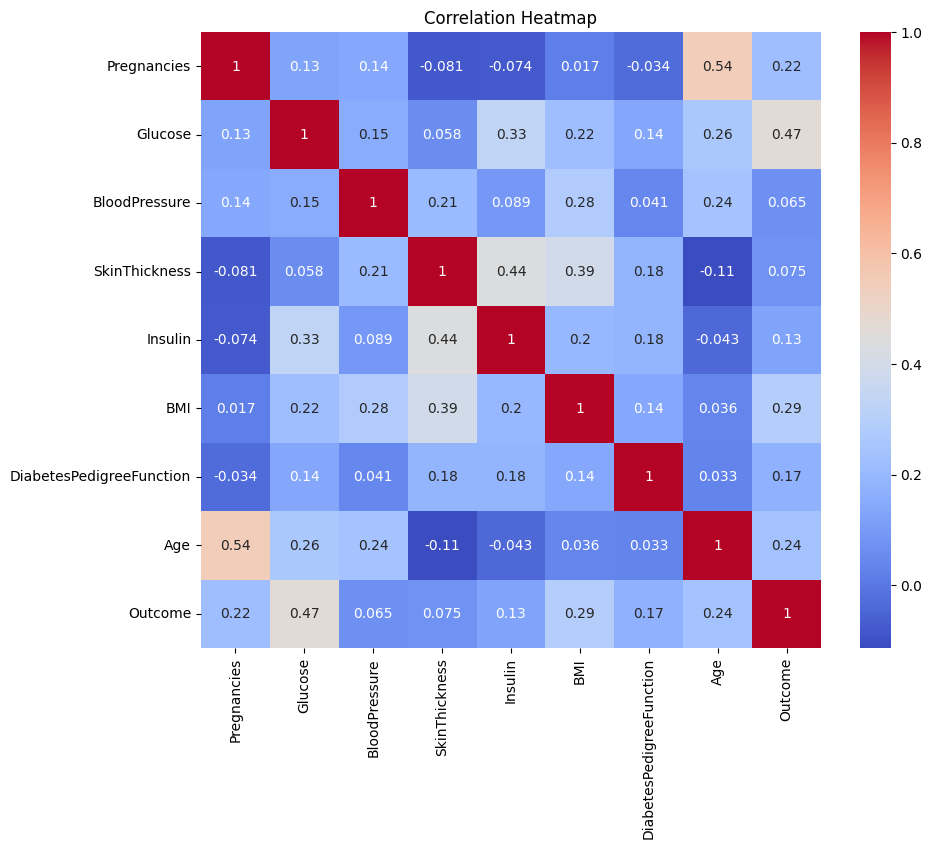

In [8]:
# Plot 4: Correlation heatmap to observe relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Step 3: Preprocessing


In [9]:
# Function to convert a string to snake_case
def to_snake_case(name):
    # Replace spaces with underscores
    name = name.replace(" ", "_")
    # Insert an underscore before each capital letter (except the first)
    name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
    # Convert the entire string to lowercase
    return name.lower()

# Apply the conversion to all column names in the dataframe
df.columns = [to_snake_case(col) for col in df.columns]

# Print updated column names to verify
print("Updated column names:")
print(df.columns)


Updated column names:
Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'b_m_i', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')


In [10]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
b_m_i                         0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64


In [11]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


### Step 4: Training Model


In [12]:
# Separate features and target
X = df.drop('outcome', axis=1)
y = df['outcome']

# Split the data (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (536, 8)
Test set shape: (231, 8)


In [13]:
# List to store pipelines with different KNN configurations
pipelines = []

# Different parameter configurations for KNN models
params = [
    {"n_neighbors": 3, "weights": "uniform"},
    {"n_neighbors": 3, "weights": "distance"},
    {"n_neighbors": 7, "weights": "uniform"},
    {"n_neighbors": 7, "weights": "distance"},
    {"n_neighbors": 11, "weights": "uniform"},
    {"n_neighbors": 11, "weights": "distance"}
]

# Create a pipeline for each parameter configuration
for param in params:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=param["n_neighbors"], weights=param["weights"]))
    ])
    pipelines.append(pipeline)

# Display the pipelines
for idx, pipe in enumerate(pipelines, start=1):
    print(f"Pipeline {idx}: {pipe}")


Pipeline 1: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline 2: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])
Pipeline 3: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])
Pipeline 4: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])
Pipeline 5: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])
Pipeline 6: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=11, weights='distance'))])


In [14]:
# Create a dictionary to store trained KNN models
trained_models = {}

# Loop through the list of pipelines, using a descriptive key for each configuration
for pipeline in pipelines:
    # Create a key from the KNN parameters
    n_neighbors = pipeline.named_steps['knn'].n_neighbors
    weights = pipeline.named_steps['knn'].weights
    key = f"n={n_neighbors}_{weights}"
    
    print(f"Training KNN model with {key} ...")
    pipeline.fit(X_train, y_train)
    trained_models[key] = pipeline

print("All KNN models trained successfully!")

Training KNN model with n=3_uniform ...
Training KNN model with n=3_distance ...
Training KNN model with n=7_uniform ...
Training KNN model with n=7_distance ...
Training KNN model with n=11_uniform ...
Training KNN model with n=11_distance ...
All KNN models trained successfully!


In [15]:
# Train each pipeline and evaluate its performance
for idx, pipeline in enumerate(pipelines, start=1):
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"Pipeline {idx} ({pipeline.named_steps['knn']}): Test Accuracy = {score:.4f}")


Pipeline 1 (KNeighborsClassifier(n_neighbors=3)): Test Accuracy = 0.6926
Pipeline 2 (KNeighborsClassifier(n_neighbors=3, weights='distance')): Test Accuracy = 0.6883
Pipeline 3 (KNeighborsClassifier(n_neighbors=7)): Test Accuracy = 0.7273
Pipeline 4 (KNeighborsClassifier(n_neighbors=7, weights='distance')): Test Accuracy = 0.7186
Pipeline 5 (KNeighborsClassifier(n_neighbors=11)): Test Accuracy = 0.7229
Pipeline 6 (KNeighborsClassifier(n_neighbors=11, weights='distance')): Test Accuracy = 0.7143



ℹ️ℹ️ Evaluation for KNN model with configuration: n=3_uniform
✅ Accuracy: 0.69
✅ Precision: 0.57
✅ Recall: 0.57
✅ F1 Score: 0.57

✅ Confusion Matrix:
[[113  36]
 [ 35  47]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       149
           1       0.57      0.57      0.57        82

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.67       231
weighted avg       0.69      0.69      0.69       231



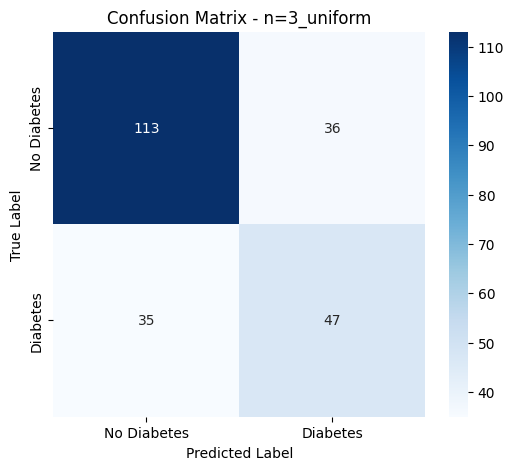


ℹ️ℹ️ Evaluation for KNN model with configuration: n=3_distance
✅ Accuracy: 0.69
✅ Precision: 0.56
✅ Recall: 0.57
✅ F1 Score: 0.57

✅ Confusion Matrix:
[[112  37]
 [ 35  47]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       149
           1       0.56      0.57      0.57        82

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



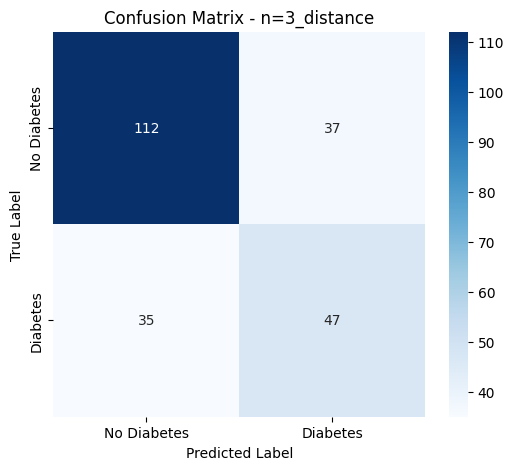


ℹ️ℹ️ Evaluation for KNN model with configuration: n=7_uniform
✅ Accuracy: 0.73
✅ Precision: 0.62
✅ Recall: 0.59
✅ F1 Score: 0.60

✅ Confusion Matrix:
[[120  29]
 [ 34  48]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       149
           1       0.62      0.59      0.60        82

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.73      0.73       231



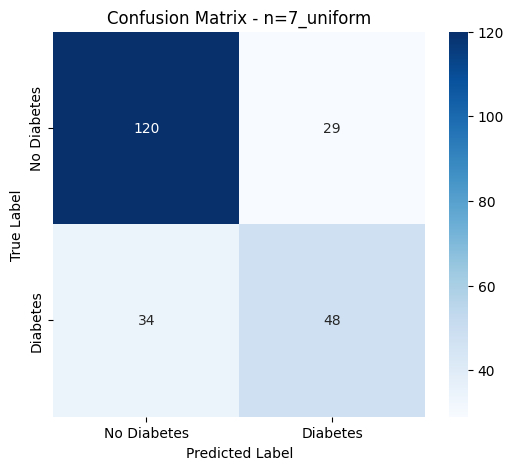


ℹ️ℹ️ Evaluation for KNN model with configuration: n=7_distance
✅ Accuracy: 0.72
✅ Precision: 0.61
✅ Recall: 0.59
✅ F1 Score: 0.60

✅ Confusion Matrix:
[[118  31]
 [ 34  48]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       149
           1       0.61      0.59      0.60        82

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



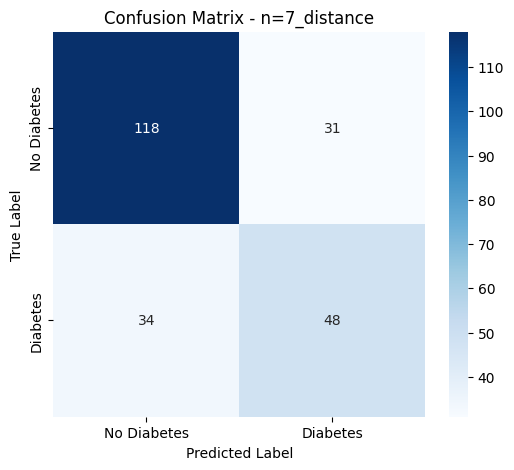


ℹ️ℹ️ Evaluation for KNN model with configuration: n=11_uniform
✅ Accuracy: 0.72
✅ Precision: 0.63
✅ Recall: 0.52
✅ F1 Score: 0.57

✅ Confusion Matrix:
[[124  25]
 [ 39  43]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       149
           1       0.63      0.52      0.57        82

    accuracy                           0.72       231
   macro avg       0.70      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



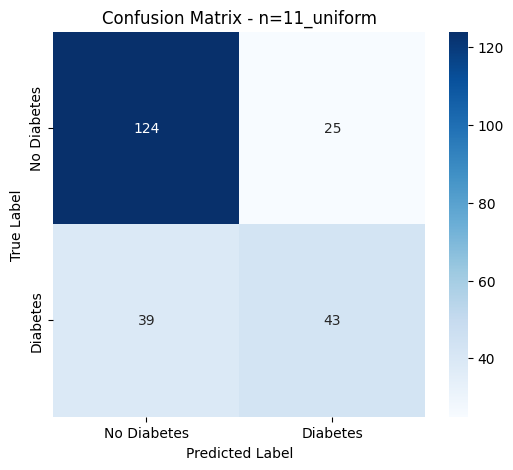


ℹ️ℹ️ Evaluation for KNN model with configuration: n=11_distance
✅ Accuracy: 0.71
✅ Precision: 0.61
✅ Recall: 0.54
✅ F1 Score: 0.57

✅ Confusion Matrix:
[[121  28]
 [ 38  44]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       149
           1       0.61      0.54      0.57        82

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.71      0.71       231



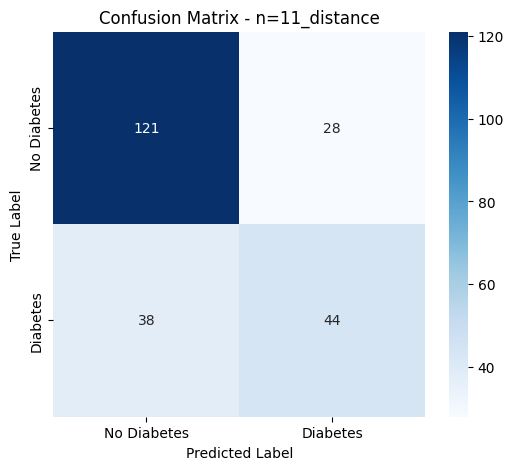

In [16]:
# Evaluate each trained KNN model
for key, model in trained_models.items():
    print(f"\nℹ️ℹ️ Evaluation for KNN model with configuration: {key}")
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print results
    print(f"✅ Accuracy: {accuracy:.2f}")
    print(f"✅ Precision: {precision:.2f}")
    print(f"✅ Recall: {recall:.2f}")
    print(f"✅ F1 Score: {f1:.2f}")
    
    print("\n✅ Confusion Matrix:")
    print(conf_matrix)
    
    print("\n✅ Classification Report:")
    print(class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["No Diabetes", "Diabetes"], 
                yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {key}")
    plt.show()

No boundary points found for model configuration n=3_uniform


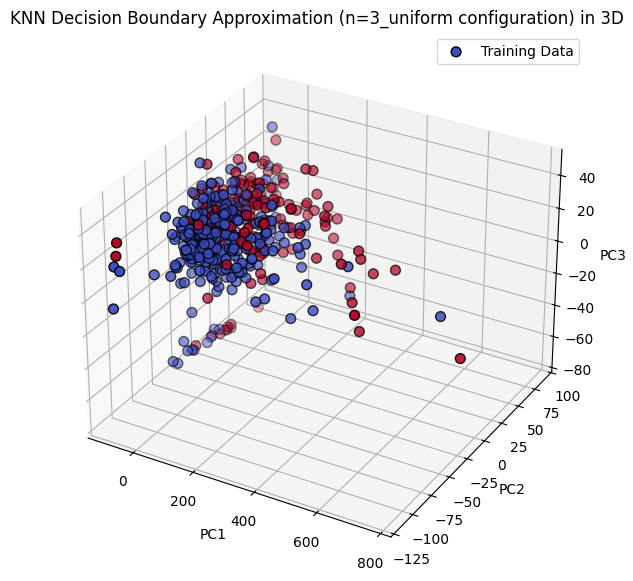

ℹ️ For configuration n=3_uniform, the approximate decision boundary is plotted as green dots in 3D.


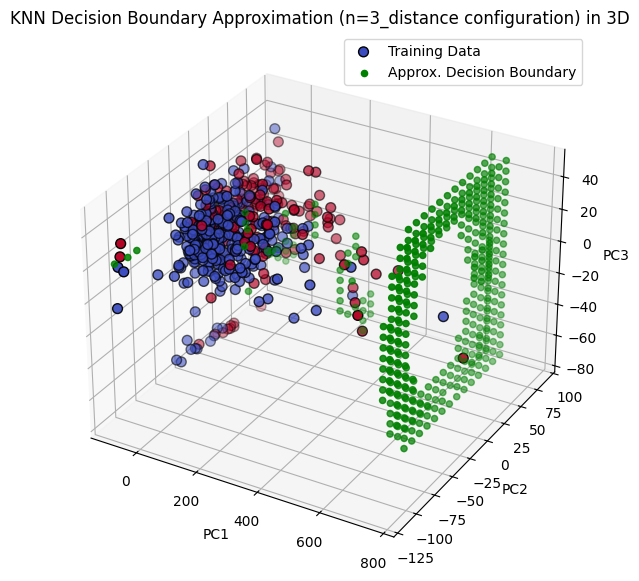

ℹ️ For configuration n=3_distance, the approximate decision boundary is plotted as green dots in 3D.
No boundary points found for model configuration n=7_uniform


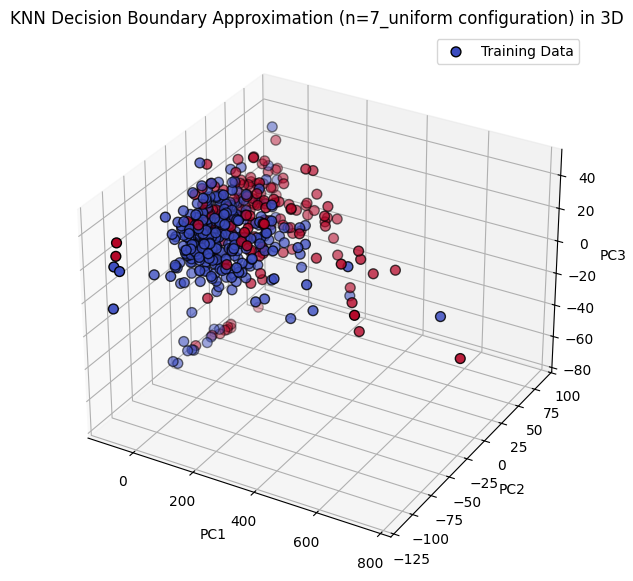

ℹ️ For configuration n=7_uniform, the approximate decision boundary is plotted as green dots in 3D.


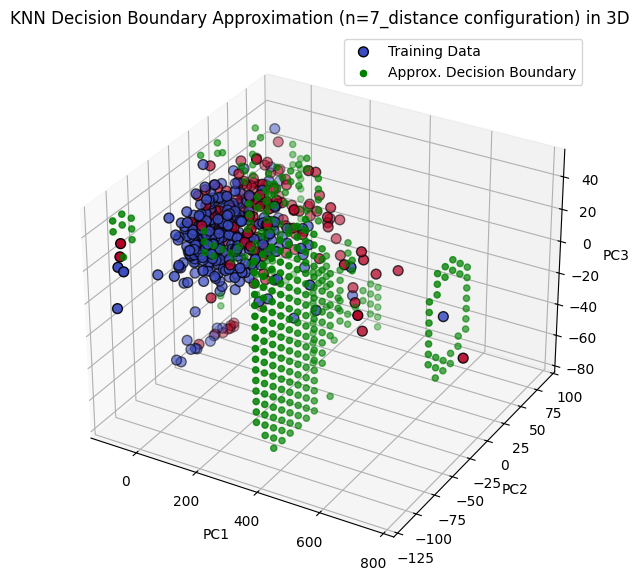

ℹ️ For configuration n=7_distance, the approximate decision boundary is plotted as green dots in 3D.


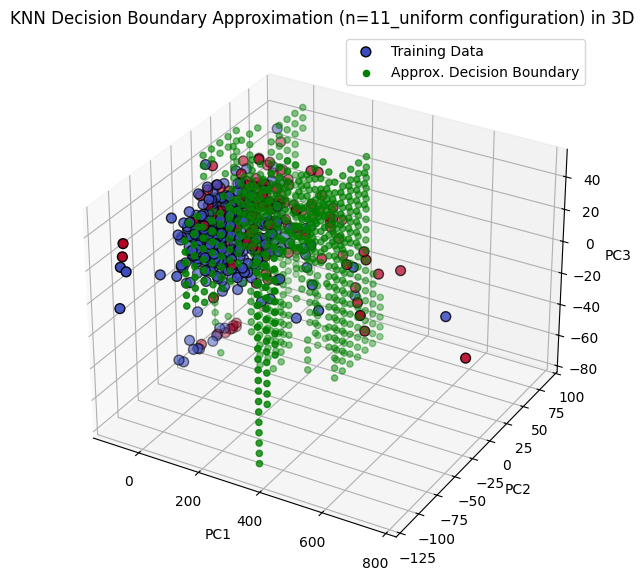

ℹ️ For configuration n=11_uniform, the approximate decision boundary is plotted as green dots in 3D.


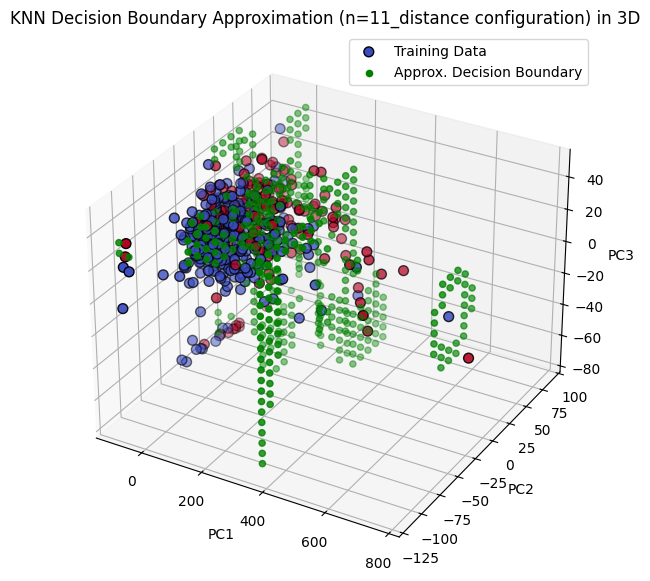

ℹ️ For configuration n=11_distance, the approximate decision boundary is plotted as green dots in 3D.


In [17]:
# Reduce X to 3D using PCA for visualization
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train)
X_test_3d = pca.transform(X_test)

# Train new KNN models on the 3D features for visualization
# (We use the same parameter configurations as in the original trained_models)
knn_models_3d = {}
for key, pipeline in trained_models.items():
    n_neighbors = pipeline.named_steps['knn'].n_neighbors
    weights = pipeline.named_steps['knn'].weights
    # Train a new KNN model directly on the 3D PCA-transformed data
    knn_3d = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn_3d.fit(X_train_3d, y_train)
    knn_models_3d[key] = knn_3d

# Plot approximate decision boundaries in 3D for each KNN model
for key, model in knn_models_3d.items():
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot of the 3D training data
    scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=y_train, cmap='coolwarm', edgecolors='k', s=50, label='Training Data')
    
    # Create a 3D grid over the PCA-transformed space
    x_min, x_max = X_train_3d[:, 0].min() - 1, X_train_3d[:, 0].max() + 1
    y_min, y_max = X_train_3d[:, 1].min() - 1, X_train_3d[:, 1].max() + 1
    z_min, z_max = X_train_3d[:, 2].min() - 1, X_train_3d[:, 2].max() + 1
    
    grid_x = np.linspace(x_min, x_max, 20)
    grid_y = np.linspace(y_min, y_max, 20)
    grid_z = np.linspace(z_min, z_max, 20)
    xx, yy, zz = np.meshgrid(grid_x, grid_y, grid_z)
    grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    
    # Compute predicted probabilities on the grid points
    probs = model.predict_proba(grid_points)[:, 1]
    
    # Identify points near the decision boundary (where probability is near 0.5)
    boundary_mask = np.abs(probs - 0.5) < 0.05
    boundary_points = grid_points[boundary_mask]
    
    # Plot the approximate decision boundary points (if found)
    if boundary_points.size > 0:
        ax.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2], color='green', s=20, label='Approx. Decision Boundary')
    else:
        print(f"No boundary points found for model configuration {key}")
    
    # Set axis labels and title
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(f"KNN Decision Boundary Approximation ({key} configuration) in 3D")
    plt.legend()
    plt.show()
    
    print(f"ℹ️ For configuration {key}, the approximate decision boundary is plotted as green dots in 3D.")
